<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/15-LeetCode/Facebook_Statistics_Interview_Question_%7C_Google_Data_Scientist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Statistics Interview Question | Google Data Scientist 



**Instruction**:

We will walkthrough the following Colab to demonstrate the solution to this question below.

An interviewer at **Facebook** asked:

> *If you sample 10,000 users multiple times, what would be the distribution of false positives?*





In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from warnings import filterwarnings

# Let's ignore warnings for now, if any.
filterwarnings('ignore')

In [ ]:
#@title Set Parameters for a Simulation
#@markdown <b>Population_distribution</b> is the distribution of the raw data with true negatives and false positives. Select one from the dropdown. </br><b>False_positive_rate</b> is the same as alpha, the significance level, of a statistical test. <br><b>Sample_size</b> is the number of observations sampled from a population distribution. <br> <b>Iterations</b> is the number of samples gathered for the simulation step below.

population_distribution = "Exponential"  #@param ['Normal', 'Exponential', 'Uniform']
false_positive_rate = 0.05  #@param {type: "number"}
sample_size = 10000 #@param {type: "number"}
iterations = 1000 #@param {type: "number"}

[INFO] The location of the rejection threshold where alpha = 0.05 is on 2.991418909779145.


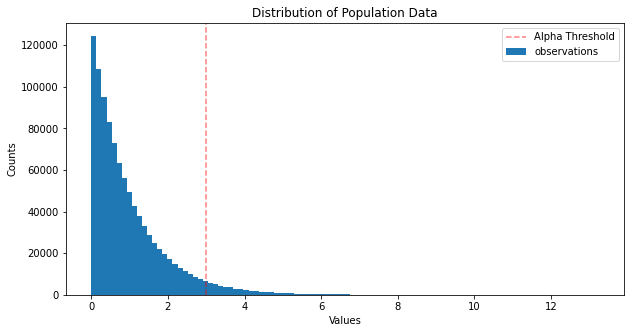

In [ ]:
#@title Step 1 - Generate Population Data
#@markdown Display the distribution of the population data (blue) and the location of the false positive threshold where the region to the right <br> of the distribution is the false_positive_rate, or alpha. (red)

pop_size = 1000000

# Generate population data
pop_data = None
if population_distribution == 'Normal': 
  pop_data = np.random.normal(size=pop_size)
elif population_distribution == 'Exponential':
  pop_data = np.random.exponential(size=pop_size)
else: 
  pop_data = np.random.uniform(size=pop_size)

alpha_threshold = np.quantile(pop_data, 1 - false_positive_rate)

print(f'[INFO] The location of the rejection threshold where alpha = {false_positive_rate} is on {alpha_threshold}.')

# Plot the population distribution
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(pop_data, bins=100, label='observations') 
ax.axvline(alpha_threshold, color='red', linestyle=('--'), alpha=0.5, label='Alpha Threshold')
plt.legend()
plt.title('Distribution of Population Data')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show() 

[INFO] Sample size: 10000
[INFO] Proportion of false-positives: 0.0492
[INFO] # of false-positives: 492


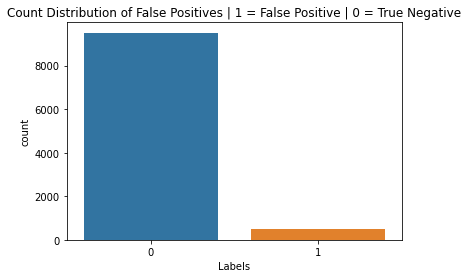

In [ ]:
#@title Step 2 - Display False Positive Counts
#@markdown The following is a binomial distribution of a single sample of 10,0000 users with "1" (False-Positive) and "0" (True-Negative).

sample_data = np.random.choice(pop_data, size=sample_size, replace=False)
false_positives = [1 if x > alpha_threshold else 0 for x in sample_data]

print(f'[INFO] Sample size: {sample_size}')
print(f'[INFO] Proportion of false-positives: {np.mean(false_positives)}')
print(f'[INFO] # of false-positives: {np.sum(false_positives)}')

sns.countplot(false_positives)
plt.title('Count Distribution of False Positives | 1 = False Positive | 0 = True Negative')
plt.xlabel('Labels')
plt.show()

100%|██████████| 1000/1000 [00:37<00:00, 26.93it/s]


[INFO] Mean: 0.0499155
[INFO] Variance: 4.7201897500000004e-06


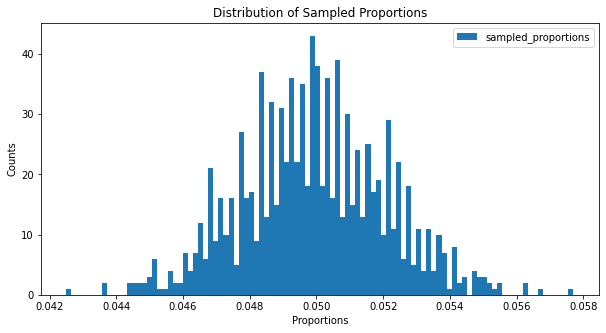

In [ ]:
#@title Step 3 - Plot the Sampled Proportions

#@markdown Draw sampled multiple times as set by the iteration parameter. Note that each sample is a proportion drawn from 10000 observations <br> labeled as either false positive or true negative. Given the Central Limit Theorem (CLT), ultimately the distribution of the false positive <br> proportions converges toward a normal distribution.

sampling_data = []
for i in tqdm.tqdm(range(iterations)):
  sample_data = np.random.choice(pop_data, size=sample_size, replace=False)
  false_positives = [1 if x > alpha_threshold else 0 for x in sample_data]
  sample_proportion = np.mean(false_positives)
  sampling_data.append(sample_proportion)

print(f'[INFO] Mean: {np.mean(sampling_data)}')
print(f'[INFO] Variance: {np.var(sampling_data)}')

# Plot the distribution of sampled proportions
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(sampling_data, bins=100, label='sampled_proportions') 
plt.legend()
plt.title('Distribution of Sampled Proportions')
plt.xlabel('Proportions')
plt.ylabel('Counts')
plt.show()